In [ ]:
from sklearn import datasets
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
from sklearn.model_selection import train_test_split

In [ ]:
#Use the iris data set from sklearn

iris = datasets.load_iris()
print(iris.DESCR)
#print(iris)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [ ]:
#Load the iris dataset. What are the features
#printing the features of the dataset
print(iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [ ]:
#coverting the features into a dataframe
iris_df=pd.DataFrame(iris.data,columns=iris.feature_names)
iris_df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
##coverting the target values into a dataframe
target_df=pd.DataFrame(iris.target)
target_df.columns=['species']
target_df.head()

,species
0,0
1,0
2,0
3,0
4,0


In [ ]:
#defining the X and Y paramenters and splitting the data into test and training
#Split the dataset into training and test sets (30%)
X=iris_df
y=target_df

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42)

print('the lenghth of the training set is ',len(X_train))
print('the lenghth of the test set is ',len(X_test))

the lenghth of the training set is  105
the lenghth of the test set is  45


In [ ]:
#Create a Gaussian RandomForestClassifier as clf (2,000 estimators and a depth of 2)
#importing the Gaussian RandomForestClassifier  and fitting the training dataset
clf=RandomForestClassifier(n_estimators=2000,max_depth=2)
clf.fit(X_train,y_train.values.ravel())


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=2, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=2000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

the predictions made by the model for the test datset is  [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0 0 0 2 1 1 0 0]
the importance of features are  petal length (cm)    0.448087
petal width (cm)     0.428048
sepal length (cm)    0.107145
sepal width (cm)     0.016720
dtype: float64


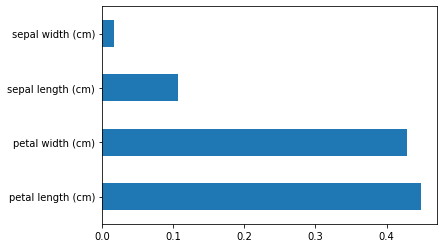

In [ ]:
#reference https://stackoverflow.com/questions/44101458/random-forest-feature-importance-chart-using-python for getting the feature importances.
#-Determine the feature importance. Which one is the most important?(i answered this question post the accuracy measure)

import numpy as np

#predicting the results from the classifier
predictions=clf.predict(X_test)
print('the predictions made by the model for the test datset is ',predictions)

#getting the feature importances of the classifiers and converting them into a Series object for easy manipulation
feat_importances = pd.Series(clf.feature_importances_, index=iris_df.columns).sort_values(ascending=False)
print('the importance of features are ',feat_importances)

import matplotlib.pyplot as plt

feat_importances.plot(kind='barh')

In [ ]:
#measuring Accuracy
#Use scikitlearn to determine the accuracy level. What is your assessment?
from sklearn import metrics
accuy_score=metrics.accuracy_score(predictions,y_test)
print('the accuracy score is ',accuy_score)

from sklearn.metrics import  classification_report
forest_class_report=classification_report(y_test,predictions)
print(forest_class_report)

the accuracy score is  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



What is your assessment?

From the above accuracy score we can say the after removing the least importannt features in this case 'sepal width' and 'sepal length' the accuracy of the model is 100%. It also means that our model is highly accurate in predicting the correct class('species' in this case) of the dataset.Also from the feature importances we can see that 'petal length' followed by the 'petal width'  are the most important features for classifying the dataset.


In [ ]:
#Use the Gradient Boosting algorithm to fit the model and predict test data
#since it has not been  mentioned to  create new datframes and display the features i am directly proceeding to Gradient Boosting algorithm using the dataframes that i have cretaed in the previous sections.
from sklearn.ensemble import GradientBoostingClassifier

#defining the new x any y parameter using the  earlier iris dataframes
new_X=iris_df
new_y=target_df

#print(new_y)

#splitting the  data into training and the test  sets
newX_train, newX_test, newy_train, newy_test = train_test_split(new_X, new_y, test_size=0.3,random_state=42)

print('the lenght of the training set is',len(newX_train))
print('the lenght of the test set is',len(newX_test))

#using the same parameters as that of random forests for comparision purposes
boosting_model=GradientBoostingClassifier(n_estimators=2000,max_depth=2)

boosting_model.fit(newX_train,newy_train.values.ravel())

the lenght of the training set is 105
the lenght of the test set is 45


GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=2,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=2000,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [ ]:
from sklearn import metrics

new_boost_pred=boosting_model.predict(newX_test)
print('the predictions by the model are',new_boost_pred)
new_boost_accuracy=metrics.accuracy_score(new_boost_pred,newy_test)
print('the accuracy for the model is',new_boost_accuracy)

the predictions by the model are [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0 0 0 2 1 1 0 0]
the accuracy for the model is 1.0


petal length (cm)    0.608653
petal width (cm)     0.374756
sepal length (cm)    0.009599
sepal width (cm)     0.006992
dtype: float64


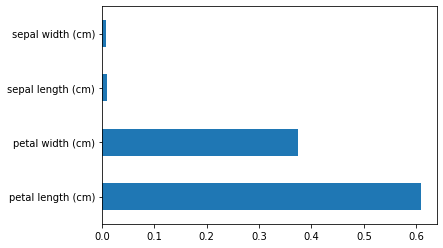

In [ ]:
#getting the feature importances of the classifiers and converting them into a Series object for easy manipulation

boosting_feat_importances = pd.Series(boosting_model.feature_importances_, index=iris_df.columns).sort_values(ascending=False)
print(boosting_feat_importances)

import matplotlib.pyplot as plt

boosting_feat_importances.plot(kind='barh')

In [ ]:
from sklearn.metrics import  classification_report
class_report=classification_report(newy_test,new_boost_pred)
print(class_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



Did the Gradient Boosting model perform better? Are there any reservations about GB and why?

from the above reports for accuracy and  other parameters the Gradient Boosting Classifier and the Gaussian RandomForestClassifier have similar values so in terms of the performance metrics there both these models are similar but the differnece comes in splitting the features based on the importances. While in the Random Forest eventhough the most important feature is 'petal length' and the second most important feature is 'petal width' the difference is very less and negligible  where as in case of Gradient boosting the diffrenece between these two features is more which makes splitting the features based on important features better than the Random forest.

the reservations when it ccomes to gradient boositing is that it is highly susceptible to noise and may result in overfitting. hence we need to tune the parameters for Gradient boosting to avoid this issue. 